## Task #1 

## Prediction using Supervised ML

### Author : Gaurav Khare

- Predict the percentage of an student based on the no. of study hours. 
- This is a simple linear regression task as it involves just 2 variables.
- You can use R, Python, SAS Enterprise Miner or any other tool 
- Data can be found at http://bit.ly/w-data
- What will be predicted score if a student studies for 9.25 hrs/ day? 

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
# Top 5 Rows of the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Botom 5 Rows of the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Determining the shape of the dataset
print("There are total %d columns in the dataset." %data.shape[1])
print("There are total %d rows in the dataset." %data.shape[0])

There are total 2 columns in the dataset.
There are total 25 rows in the dataset.


In [6]:
# Basic Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# Determining the Datatype of the dataset
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
# Determining the unique values in the dataset
data.nunique()

Hours     23
Scores    23
dtype: int64

We see that we have 23 unique values in the dataset, which means that 2 of the values are repeated

In [9]:
#Determining the missing values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
#Determining the null values in the dataset
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
# Descriptive Statistics of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


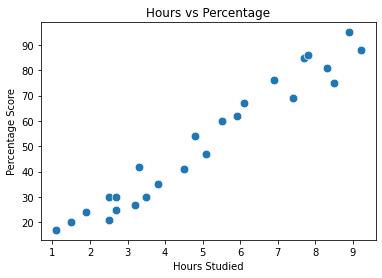

In [12]:
# Plotting the distribution of scores
sns.scatterplot(x='Hours',y='Scores',data=data,s=75)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

We can infer that more hours of study result in more percentage of marks scored

In [13]:
# Taking the Target Variable on the Y Axis and Dependent Variable on the X Axis
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [14]:
# divide data into train and test
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

### Plotting Distribution of Training & Testing Dataset

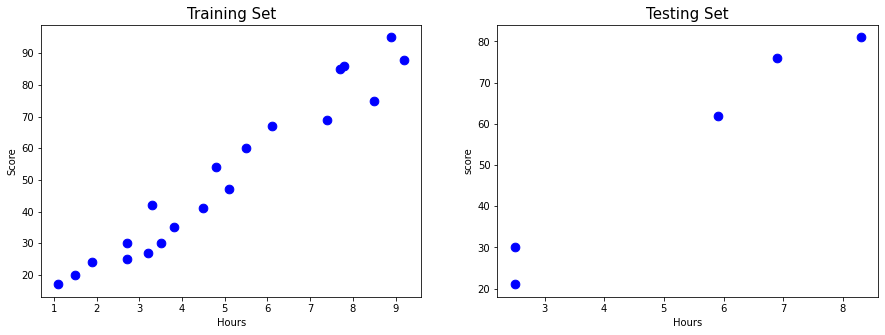

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Training Set', fontsize=15)
ax[0].scatter(X_train, y_train, s=75, color='blue')
ax[0].set_xlabel('Hours')
ax[0].set_ylabel('Score')
ax[1].set_title('Testing Set', fontsize=15)
ax[1].scatter(X_test, y_test, s=75, color='blue')
ax[1].set_xlabel('Hours')
ax[1].set_ylabel('score')
plt.show()

### Model Building

In [16]:
# Fitting the model and training the train dataset
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
model = lr.fit(X_train, y_train) 

In [17]:
#retrieve the intercept:
print(lr.intercept_)

2.826892353899737


In [18]:
# retrieving the slope(coefficient of x):
print(lr.coef_)

[9.68207815]


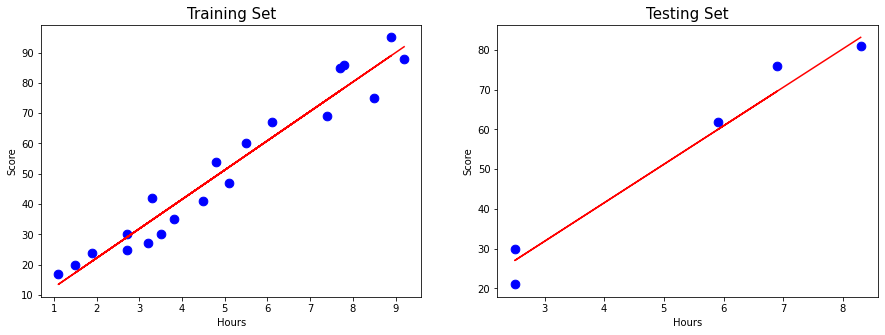

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Training Set', fontsize=15)
ax[0].scatter(X_train, y_train, s=75, color='blue')
ax[0].plot(X_train, lr.coef_*X_train + lr.intercept_, '-r')
ax[0].set_xlabel('Hours')
ax[0].set_ylabel('Score')
ax[1].set_title('Testing Set', fontsize=15)
ax[1].scatter(X_test, y_test, s=75, color='blue')
ax[1].plot(X_test, lr.coef_*X_test + lr.intercept_, '-r')
ax[1].set_xlabel('Hours')
ax[1].set_ylabel('Score')
plt.show()

In [20]:
### Making Predictions
y_pred = lr.predict(X_test)

In [21]:
df = pd.DataFrame({'Hours': X_test[:,0],'Actual_Score': y_test, 'Predicted_Score': y_pred})
df

,Hours,Actual_Score,Predicted_Score
0,8.3,81,83.188141
1,2.5,30,27.032088
2,2.5,21,27.032088
3,6.9,76,69.633232
4,5.9,62,59.951153


### Model Evaluation

In [22]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R2-Score: 0.9678055545167994


In [23]:
#hours = np.array([9.25]).reshape(-1,1)
hours = 9.25
test_prediction=lr.predict([[hours]])

In [24]:
print("For %.2f Hours,the percentage of marks scored is: %.0f" % (hours, test_prediction))

For 9.25 Hours,the percentage of marks scored is: 92


### If a student studies for 9.25 hrs/day, the Score will be 92 as per this model.


### Thank You!